# Unlocking biological significance from the data

### Filtering of peptides

In the previous section [Processing of mass spectrometry data](data_import_process.ipynb), we used a volcano plot to visualise data from MSfragger, to generate a volcano plot – but how can we access information regarding the peptides and proteins described in the figure?

We do this by filtering the data, with the package `dplyr` and `tidyr`. An example of the code to filter peptides based on significance at the peptide and protein level is described below:
```
peptide_sig = peptide %>% filter(p_adj < 0.05 & sarscov2_control_ratio >0.6 & 
                                   semi_tryptic == TRUE & sig_protein == FALSE)
```



If we execute this code, we derive the significantly different peptides: 

In [5]:
# first, load required packages
library(dplyr)
library(tidyr)
library(reshape2)
library(ggplot2)
library(gghighlight)

In [7]:
# next, read in data file
peptide = read.csv("../data/peptide_processed.csv", header = TRUE)

# filter for significant differences
peptide_sig = peptide %>% filter(p_adj < 0.05 & sarscov2_control_ratio >0.6 & 
                                   semi_tryptic == TRUE & sig_protein == FALSE)

We can print this table to identify the peptide sequences in question:

In [12]:
print(peptide_sig$Peptide)

 [1] "GDRSEDFGVNEDLAD"  "RLLEDGEDFNLGDALD" "GLLAGNEK"         "SAPGTDLAK"       
 [5] "SLLEGQEDHYNNLS"   "DNLTLWTSENQGDEGD" "SVPAAEPEYPK"      "ALPGDNVGFNVK"    
 [9] "GHYTEGAELVD"      "EDMAALEKDYEEVGVD"


Interestingly, many of these semi-tryptic peptides end with 'D' (i.e. aspartic acid). Based on the position of this amino acid, it is likely that the semi-tryptic peptides were generated by caspases

What about the genes that encode these peptides? – we can obtain this information too:

In [15]:
print(peptide_sig$Gene)

 [1] "ANXA1"  "KRT18"  "KRT19"  "KRT19"  "KRT19"  "YWHAB"  "AK2"    "EEF1A1"
 [9] "TUBB4B" "TUBA1A"


### Plotting subsets of data

Now if we prefer, we can plot only the semi-tryptic peptides that pertain to proteins that are not significantly different between conditions:

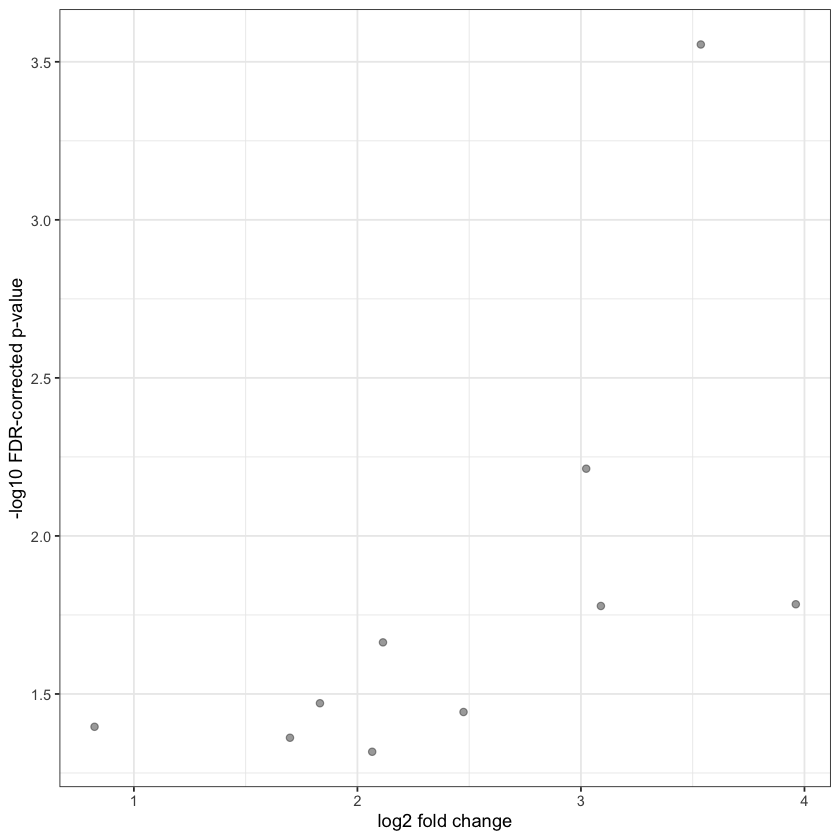

In [8]:
g1 <- ggplot(data=peptide_sig, 
            aes(x=sarscov2_control_ratio, y =-log10(p_adj))) +
  geom_point(alpha=0.4, size=1.75) +
  xlab("log2 fold change") + ylab("-log10 FDR-corrected p-value") +
  theme_bw() #+
g1

```{glue:figure} g1
:figwidth: 700px
:name: "crossref_key"
Differentially expressed semi-tryptic peptides
```

Should we wish to generate a plot where the the data points are labelled, we can do so with the following code:
```
g3 <- ggplot(data=peptide_sig, 
            aes(x=sarscov2_control_ratio, y =-log10(p_adj), label=Gene)) +
  geom_point(alpha=0.4, size=1.75) +
  geom_text(label = peptide_sig$Gene) +
  xlab("log2 fold change") + ylab("-log10 FDR-corrected p-value") +
  theme_bw()
g3
```

Executing this code gives the following output:

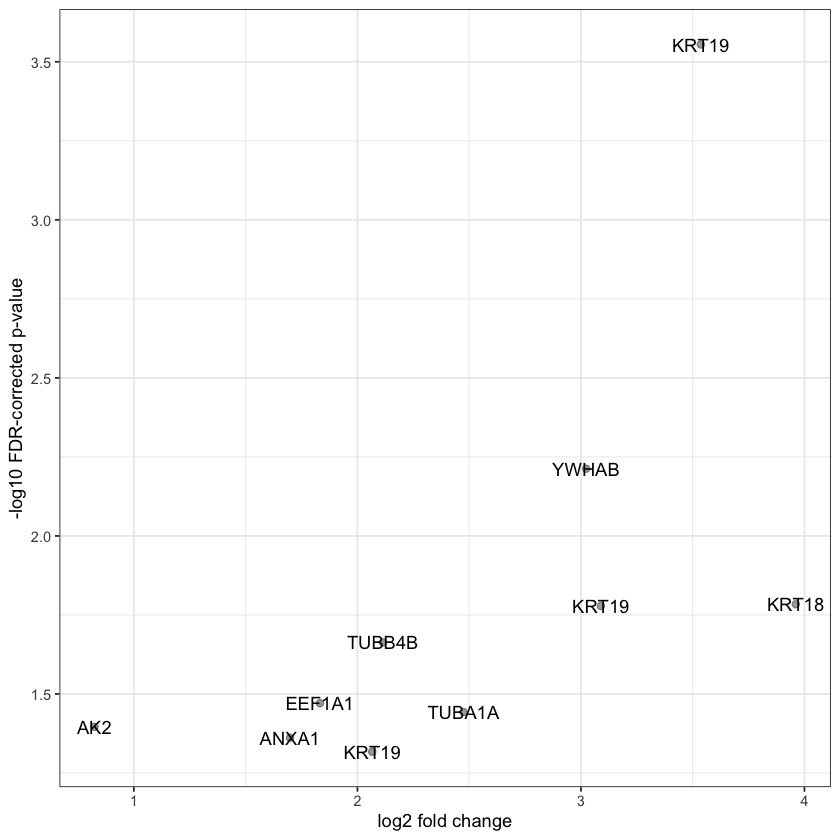

In [16]:
g <- ggplot(data=peptide_sig, 
            aes(x=sarscov2_control_ratio, y =-log10(p_adj), label=Gene)) +
  geom_point(alpha=0.4, size=1.75) +
  geom_text(label = peptide_sig$Gene) +
  xlab("log2 fold change") + ylab("-log10 FDR-corrected p-value") +
  theme_bw() #+
g

```{glue:figure} g3
:figwidth: 700px
:name: "crossref_key"
Annotated differentially expressed semi-tryptic peptides
```

We can't rule out that semi-tryptic peptides pertaining to proteins that **are**  significantly different between conditions are biologically relevant; we can filter them and view as follows:

In [25]:
# filter for significant differences
pep_sig_prot_sig = peptide %>% filter(p_adj < 0.05 & sarscov2_control_ratio >0.6 & 
                                   semi_tryptic == TRUE & sig_protein == TRUE)

print(pep_sig_prot_sig$Gene)

[1] "S"   "N"   "N"   "MX1"


This is unsurprsing; 3 of the 4 peptides pertain to Sars-CoV-2 proteins. 1 peptide pertains to the protein encoded by MX1, a human gene associated with anti-viral responses

### Irrelevant images

To conclude the book, here are a couple of irrelevant images:

 ```{figure} ../tails_1.png
 ---
 height: 200px
 name: tails1
 ---
 Example TMT prototeomics datasets
 ```
 
 ```{figure} ../tails_2.png
 ---
 height: 200px
 name: tails2
 ---
 Another example TMT prototeomics dataset
 ```
Both {numref}`tails1` and {numref}`tails2` are examples of datasets where these methods could be applied.
 

### Irrelevant formulae

I need another couple of formulae in this page to meet the marking criteria. So here they are:

```{math}
:label: mxc
y = mx+c
```

```{math}
:label: random
a^2 - b^2 = (a-b)(a+b)
```